In [1]:
import re #for regular expressions
import nltk #for text manipulation
import string
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
from nltk.stem.porter import *
from sklearn.model_selection import train_test_split    
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim 
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes Classifier
from sklearn.metrics import *
from collections import Counter


In [2]:
train = pd.read_csv('../01_Data/02_Processed/train.csv')
test = pd.read_csv('../01_Data/02_Processed/test.csv')

In [3]:
# Combining the train and test data for cleaning
combine=pd.concat([train,test],ignore_index=True)

In [4]:
def find_best_alpha(tweets_data):      
    bow_vectorizer = CountVectorizer(ngram_range = (1, 4), max_df=0.90 ,min_df=2 , stop_words='english')
    bow = bow_vectorizer.fit_transform(tweets_data['tokenized'])

    X_train, X_test, y_train, y_test = train_test_split(bow, tweets_data['class'], test_size=0.2, random_state=69)
    best_alpha = 0
    best_score = 0
    for alpha in np.arange(0.1, 1.1, 0.1):
        model = MultinomialNB(alpha=alpha)
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        if score > best_score:
            best_alpha = alpha
            best_score = score
    print("Best alpha: {}".format(best_alpha))
    print("Best score: {}".format(best_score))
    return best_alpha

In [5]:
def naive_bayes_model(tweets_data):
   
    bow_vectorizer = CountVectorizer(ngram_range = (1, 4), max_df=0.90 ,min_df=2 , stop_words='english')
    bow = bow_vectorizer.fit_transform(tweets_data['tokenized'])

    X_train, X_test, y_train, y_test = train_test_split(bow, tweets_data['class'],
                                                    test_size=0.2, random_state=69)

    print("X_train_shape : ",X_train.shape)
    print("X_test_shape : ",X_test.shape)
    print("y_train_shape : ",y_train.shape)
    print("y_test_shape : ",y_test.shape)

    best_alpha = find_best_alpha(tweets_data)

    model_naive = MultinomialNB(alpha = best_alpha).fit(X_train, y_train) 
    predicted_naive = model_naive.predict(X_test)

    return predicted_naive, y_test

In [6]:
def conf_mat(tweets_data):
    model_results = naive_bayes_model(tweets_data)
    predicted_naive = model_results[0]
    y_test = model_results[1]
    
    plt.figure(dpi=600)
    mat = confusion_matrix(y_test, predicted_naive)
    sns.heatmap(mat.T, annot=True, fmt='d', cbar=False)

    plt.title('Confusion Matrix for Naive Bayes')
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    plt.savefig("confusion_matrix.png")
    return plt.show()

In [7]:
def metrics(tweets_data):
    model_results = naive_bayes_model(tweets_data)
    predicted_naive = model_results[0]
    y_test = model_results[1]

    # Accuracy
    score_naive = accuracy_score(predicted_naive, y_test)
    print("Accuracy with Naive-bayes: ",score_naive)

    # F1 Score
    f1_naive = f1_score(predicted_naive, y_test, average='weighted')
    print("F1 Score with Naive-bayes: ",f1_naive)

    # AUC
    auc_naive = roc_auc_score(predicted_naive, y_test)
    print("AUC with Naive-bayes: ",auc_naive)
    
    return 

In [8]:
metrics(combine)

X_train_shape :  (6400, 8781)
X_test_shape :  (1600, 8781)
y_train_shape :  (6400,)
y_test_shape :  (1600,)
Best alpha: 0.7000000000000001
Best score: 0.9225
Accuracy with Naive-bayes:  0.9225
F1 Score with Naive-bayes:  0.9225
AUC with Naive-bayes:  0.9226744431369055


X_train_shape :  (6400, 8781)
X_test_shape :  (1600, 8781)
y_train_shape :  (6400,)
y_test_shape :  (1600,)
Best alpha: 0.7000000000000001
Best score: 0.9225


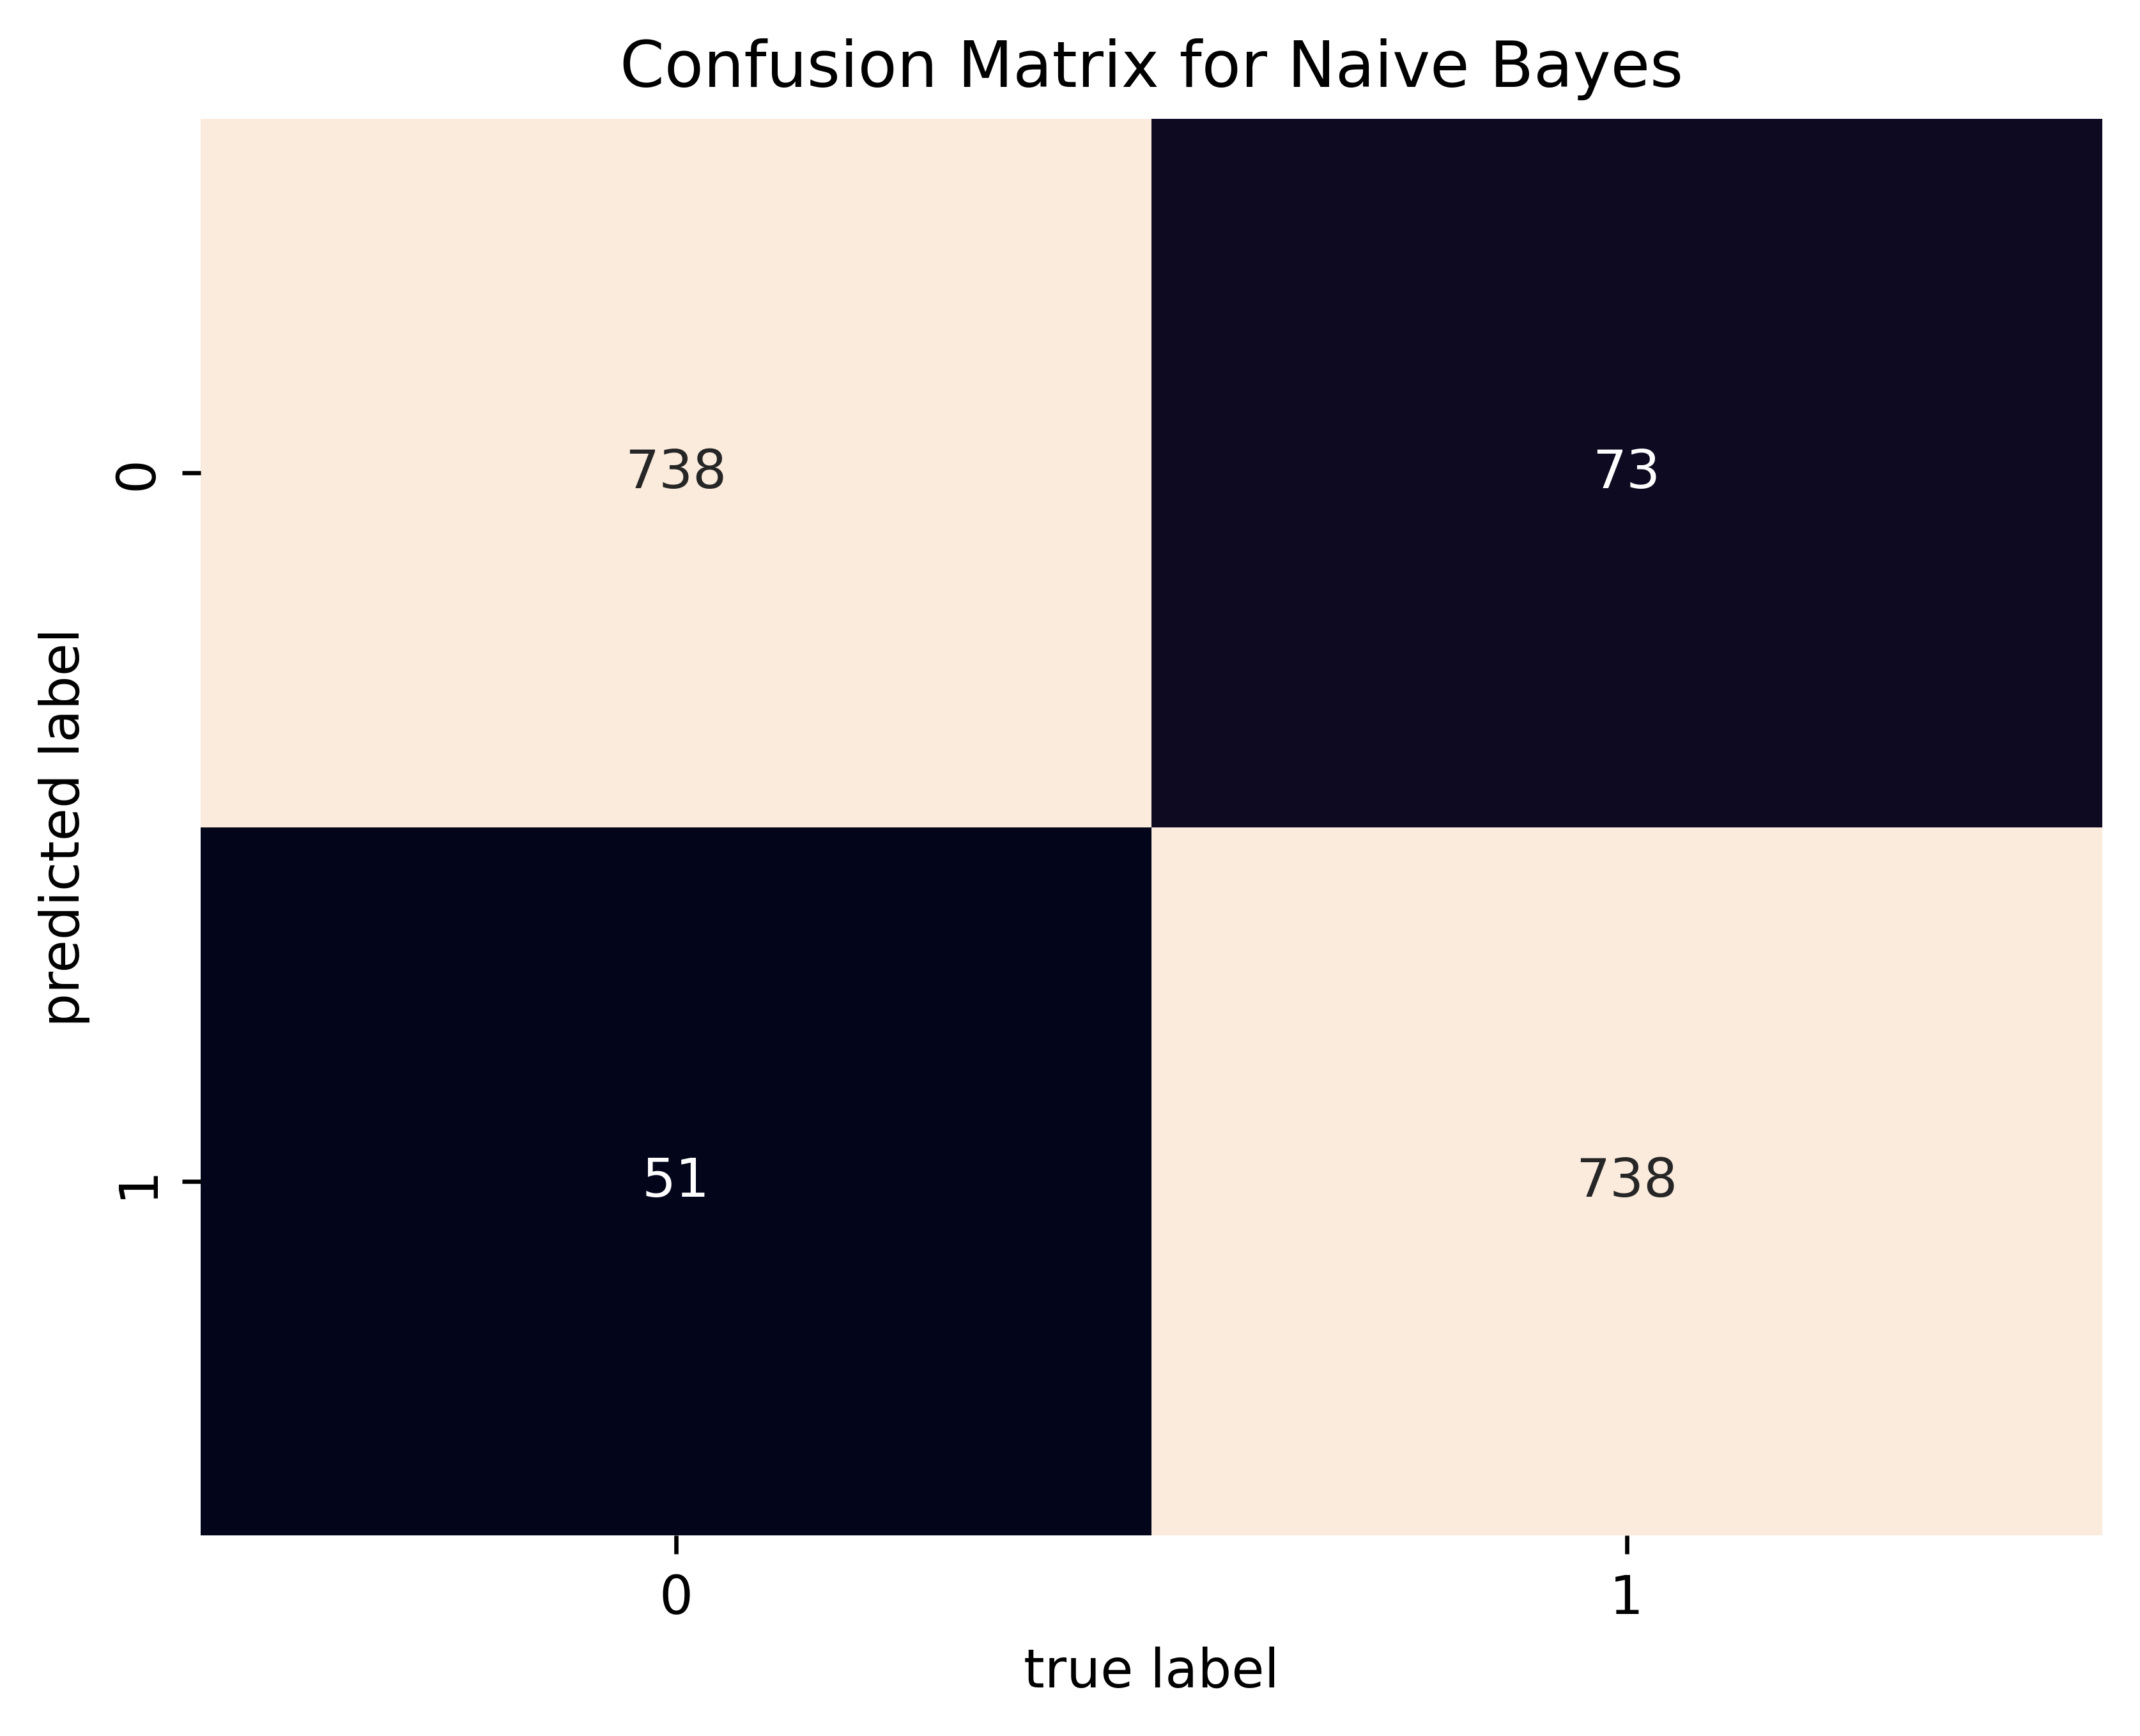

In [9]:
conf_mat(combine)

In [10]:
naive_bayes_model(combine)

X_train_shape :  (6400, 8781)
X_test_shape :  (1600, 8781)
y_train_shape :  (6400,)
y_test_shape :  (1600,)
Best alpha: 0.7000000000000001
Best score: 0.9225


(array([2, 1, 1, ..., 2, 2, 2]),
 6262    2
 5630    1
 4369    1
 5956    1
 2089    2
        ..
 3909    1
 1055    2
 6347    2
 6410    2
 7243    2
 Name: class, Length: 1600, dtype: int64,
 MultinomialNB(alpha=0.7000000000000001))

### synthetic  data

In [11]:
train , test = train_test_split(combine,test_size=0.2, random_state=69)
x_train,y_train,x_test,y_test = train['tokenized'].values,train['class'].values,test['tokenized'].values,test['class'].values
print(f'Train data has {x_train.shape[0]} samples')
print(f'Test data has {x_test.shape[0]} samples')

Train data has 6400 samples
Test data has 1600 samples


In [12]:
## encode text using tfidf 

vectorizer = TfidfVectorizer()
vectorizer.fit(x_train)
x_train1 = vectorizer.transform(x_train)
x_test1 = vectorizer.transform(x_test)

In [13]:
word_list = []

for sent in x_train:
    for word in sent.split():
        if word != '':
            word_list.append(word)

#make vocab dictionary
corpus = Counter(word_list)
corpus_ = sorted(corpus,key=corpus.get,reverse=True)[:5000]

#transform courpus to tfidf vector
vocabvec = vectorizer.transform(np.array(corpus_))

In [14]:
print(f'Length of vocabulary is {len(corpus_)}')

Length of vocabulary is 5000


In [18]:
#generate probabilities of a word in corpus being neg or pos
best_alpha = find_best_alpha(combine)

model_naive = MultinomialNB(alpha = best_alpha).fit(x_train, y_train) 

y_pred = model_naive.predict(vocabvec)

Best alpha: 0.7000000000000001
Best score: 0.9225


ValueError: could not convert string to float: "['asain', 'take', 'wu', 'tang', 'clan', 'draft', 'suppos', 'half', 'breed', 'like']"